Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

---

Please **submit this Jupyter notebook through Canvas** no later than **November 30, 15:00**.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
In the box below, write down the names + student ID of the people in your group.

WENBO SUN 13087347 \
SHUAI WANG 13128051

# The global keyword (helpful info for exercise 3)
In exercise 3 you are asked, at some point, to count the number of times a certain function is evaluated. One way of doing this is using a global variable. To change a global variable x from inside a function, the global keyword is used.

In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

# to change a global variable x from inside a function, use the global keyword
def foo():
    global x
    x = x*2
    
x=4
print("x before:", x) 
foo()
print("x after:", x)

# verify for yourself that omitting the line "global x" produces an error

x before: 4
x after: 8


-----
# Exercise 1
**N.B. This is a pen-and-paper exercise. If you prefer you may upload a separate pdf for this exercise and other pen-and-paper exercises. If you do, don't put both files in a single .zip file, upload them both separately.**

## (a) (exercise 6.4(b)) 1 point

Consider the minimization of 
$$
  f(x,y) = x^2 + y^2
$$
subject to
$$
  g(x,y) = xy^2 -1 = 0 .
$$
Determine the critical points of the Lagrangian function for this problem and determine whether each is a constrained minimum, a constrained maximum, or neither.


$$
$$

## (b) (exercise 6.4(c)) 1 point

Minimize $x+y+3$ under the constraint that $x^2 + x +y^2+y = 4$. Prove that the point you find is a minimum.

YOUR ANSWER HERE

---
# Exercise 2

## (a) 1 point
 The Rosenbrock function is given by

$$
f(x,y) = 100 (y-x^2)^2 + (1-x)^2
$$

What is the gradient of $f$? Show that there is exactly one local minimum point and determine this point (N.B. this is a pen-and-paper exercise.)

YOUR ANSWER HERE

## (b) 2 points
Implement the method of steepest descent. Use ``scipy.optimize.line_search`` as line search method.

Test your method on the Rosenbrock function starting from $(x,y) = (0,0)$.
Plot the convergence to the minimum.


[0.98676319 0.97365694]


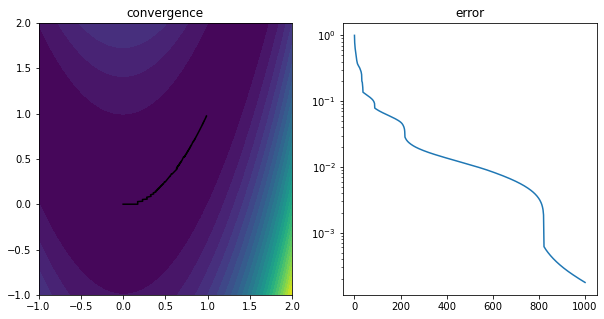

In [7]:
from scipy.optimize import line_search
# python code here
def rosenbrock(x):
    return 100*(x[1]-x[0]**2)**2+(1-x[0])**2

def gradf(x):
    return np.array([-400*x[0]*x[1]+400*x[0]**3-2+2*x[0],200*(x[1]-x[0]**2)])


x = np.array([0,0])
x_vals = [np.array([0,0])]
iter_num=1000
for i in range(iter_num):
    s=-1*gradf(x)
    alpha=line_search(rosenbrock,gradf,x,s)[0]
    x=x+alpha*s
    x_vals.append(x)
print(x)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
X, Y = np.linspace(-1, 2, 101), np.linspace(-1,2, 101)
xx, yy = np.meshgrid(X, Y)
ff = np.zeros(xx.shape)
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        ff[j,i] = rosenbrock((x,y))
ax0.contourf(xx,yy,ff, levels=25, cmap='viridis')
ax0.plot([x[0] for x in x_vals], [x[1] for x in x_vals], 'k-')
ax0.set_title("convergence")
ax1.semilogy([np.abs(rosenbrock((x,y))) for (x,y) in x_vals])
ax1.set_title("error")
plt.show()

----
# Exercise 3

## (a) 2 points

Implement the BFGS method for unconstrained optimization, given in Heath chapter 6. Test the correctness of the code using the data in Example 6.13.

In [3]:
from scipy.linalg import solve

def BFGS(f,gradf,x,H,max_iter):
    c=len(x)
    x_trace=[x]
    for i in range(max_iter):
        grad=gradf(x)
        s=solve(H,-1*grad)
        x=x+s
        x_trace.append(x)
        y=np.mat(gradf(x)-grad).T
        s=np.mat(s).T
        H=H+y*y.T/(y.T*s)-(H*s*s.T*H)/(s.T*H*s)
    return x,x_trace

f=lambda x:0.5*x[0]**2+2.5*x[1]**2
g=lambda x:np.array([x[0],5*x[1]])

x0=np.array([5,1])
H0=np.identity(2)
print(BFGS(f,g,x0,H0,10)[0])

[-7.47355565e-17  7.71498832e-18]


## (b) 2 points

Apply your implementation of the BFGS method to find a local minimum of the Rosenbrock function (see previous exercise). Use starting point $(0,0)$ and do not assume any knowledge of the Hessian when you choose $B_0$.
Plot the convergence to the minimum.

[1. 1.]


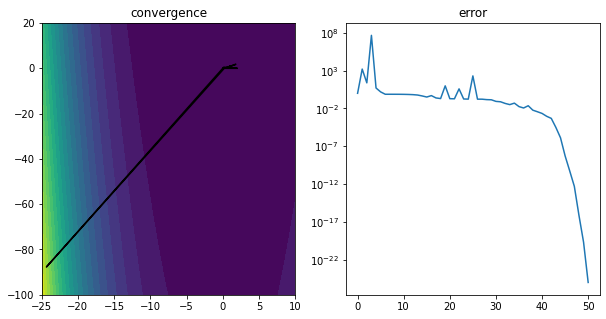

In [6]:
x0=np.array([0,0])
H0=np.identity(2)
final_x,x_trace=BFGS(rosenbrock,gradf,x0,H0,50)
print(final_x)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10,5))
X, Y = np.linspace(-25, 10, 201), np.linspace(-100,20, 121)
xx, yy = np.meshgrid(X, Y)
ff = np.zeros(xx.shape)
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        ff[j,i] = rosenbrock((x,y))
ax0.contourf(xx,yy,ff, levels=25, cmap='viridis')
ax0.plot([x[0] for x in x_trace], [x[1] for x in x_trace], 'k-')
ax0.set_title("convergence")
ax1.semilogy([np.abs(rosenbrock((x,y))) for (x,y) in x_trace])
ax1.set_title("error")
plt.show()

## (c) 1 point
How does the convergence compare to that of gradient descent (see
previous question)? Let your program count the number of function and gradient evaluations and
consider this in your comparison. Implement a stopping criterion in both methods that runs until $||x_k-x^*||_2 < 10^{-5}$.


In [5]:
def grad_descent(x):
    count=0
    while(scipy.linalg.norm(x-np.array([1,1]),2)>=1e-5):
        s=-1*gradf(x)
        alpha=line_search(rosenbrock,gradf,x,s)[0]
        x=x+alpha*s
        count+=1
    return x,count
        
def BFGS_v1(x,H):
    count=0
    while(scipy.linalg.norm(x-np.array([1,1]),2)>=1e-5):
        grad=gradf(x)
        s=solve(H,-1*grad)
        x=x+s
        y=np.mat(gradf(x)-grad).T
        s=np.mat(s).T
        H=H+y*y.T/(y.T*s)-(H*s*s.T*H)/(s.T*H*s)
        count+=1
    return x,count

x0=np.array([0,0])
H0=np.identity(2)
print(grad_descent(x0))
print(BFGS_v1(x0,H0))
    

(array([0.99999554, 0.99999105]), 6935)
(array([0.9999957, 0.999992 ]), 46)


#### Computational cost
BFGS is a Quasi-Newton method with a superlinear convergence, larger than linear convergence (close to 1) of Steepest Descent method. In this experiment, BFGS needs 46 iterations and Steepest Decent method needs more than 6900 iterations to reach same accuracy. Hence, these two algorithm has a huge difference in compuational cost.
#### Behaviour
According to the converging curve, the steepest descent method keep converging towards the target point at every iteration.
However, the BFGS demonstrate fluctuating error during converging process. 